# auto sklearn

https://automl.github.io/auto-sklearn/master/manual.html#manual

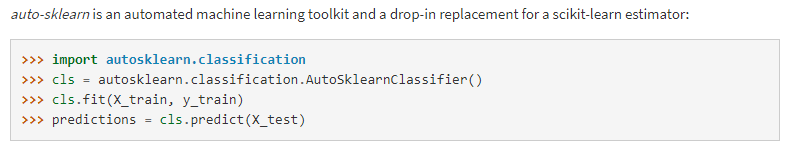

### ref:
- Efficient and Robust Automated Machine Learning, Feurer et al., Advances in Neural Information Processing Systems 28 (NIPS 2015).
- Auto-Sklearn 2.0: The Next Generation, Feurer et al., (arXiv, 2020).

In [1]:
!pip3 install auto-sklearn

In [2]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

## Simple

### Restricting the searchspace

## njob
https://automl.github.io/auto-sklearn/master/examples/60_search/example_parallel_n_jobs.html

In [3]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

X, y = sklearn.datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_parallel_1_example_tmp',
    output_folder='/tmp/autosklearn_parallel_1_example_out',
    n_jobs=8,
    # Each one of the 4 jobs is allocated 3GB
    memory_limit=10240,
    seed=5,
)
automl.fit(X_train, y_train, dataset_name='iris')

# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())


[WARNING] [2021-06-04 19:39:30,194:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-06-04 19:39:39,907:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-06-04 19:39:51,129:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-06-04 19:39:51,297:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-06-04 19:39:59,346:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-06-04 19:40:05,931:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

NameError: name 'y_hat' is not defined

In [4]:
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.9736842105263158


In [12]:
!ls

001.ipynb  004.ipynb	      iris-classifier.pkl  R01.ipynb  vis
002.ipynb  autosklearn.ipynb  june_toolbox	   sub	      xgb.h5
003.ipynb  data		      pandera.ipynb	   tmp	      xgb.model


In [8]:
import os
os.makedirs('./tmp')

In [9]:
import pickle

# save model
with open('./tmp/iris-classifier.pkl', 'wb') as f:
    pickle.dump(automl, f)

# load model
with open('tmp/iris-classifier.pkl', 'rb') as f:
    loaded_classifier = pickle.load(f)

In [10]:
y_hat = loaded_classifier.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.9736842105263158


## 其他method
- automl.cv_results_ 
 - cv_results_ returns a dict with keys as column headers and values as columns
- automl.sprint_statistics() 
 - sprint_statistics() is a method that prints the name of the dataset, the metric used, and the best validation score obtained by running auto-sklearn
- automl.show_models() 
 - The results obtained from the final ensemble can be printed by calling show_models()

In [ ]:
for i in automl.cv_results_.keys():
    print(i)

In [ ]:
print(automl.sprint_statistics())

In [ ]:
automl.get_models_with_weights()

In [ ]:
# The results obtained from the final ensemble can be printed by calling show_models()

automl.show_models() 

In [ ]:
automl.predict(X_test)

In [ ]:
y_test